In [205]:
#detection of fraud insurance claim 

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [207]:
#lets read the csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [208]:
#lets convert the csv file into dataframe

Fraud=pd.DataFrame(data=df)

In [209]:
Fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [210]:
Fraud.shape
#the dataset has 1000 rows and 40 columns

(1000, 40)

In [211]:
Fraud.dtypes
#the dataset is object,float and integer type

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [212]:
#lets look for missing values if any

Fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [213]:
#lets drop some columns
Fraud.drop(["policy_number","policy_bind_date","incident_date","auto_model","auto_year","incident_location","_c39"],axis=1,inplace=True)

In [214]:
Fraud

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,?,0,0,?,5070,780,780,3510,Mercedes,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,NO,0,1,NO,6500,1300,650,4550,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,YES,0,1,?,87200,17440,8720,61040,Honda,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,YES,2,3,?,108480,18080,18080,72320,Volkswagen,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,?,2,3,YES,67500,7500,7500,52500,Suburu,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,?,0,1,YES,46980,5220,5220,36540,Audi,N


In [215]:
#lets check for unique values to be replaced
Fraud.collision_type.head

<bound method NDFrame.head of 0       Side Collision
1                    ?
2       Rear Collision
3      Front Collision
4                    ?
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                  ?
Name: collision_type, Length: 1000, dtype: object>

In [216]:
#lets replace ? with np.NaN
Fraud.replace("?",np.NaN,inplace=True)

In [217]:
Fraud

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,NaN,0,0,NaN,5070,780,780,3510,Mercedes,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,NO,0,1,NO,6500,1300,650,4550,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,YES,0,1,NaN,87200,17440,8720,61040,Honda,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,YES,2,3,NaN,108480,18080,18080,72320,Volkswagen,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,NaN,2,3,YES,67500,7500,7500,52500,Suburu,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,NaN,0,1,YES,46980,5220,5220,36540,Audi,N


In [218]:
#Lets replace the np.NaN with mode values

In [219]:
Fraud["collision_type"]=Fraud.collision_type.fillna(Fraud["collision_type"].mode()[0])

In [220]:
Fraud["property_damage"]=Fraud.property_damage.fillna(Fraud["property_damage"].mode()[0])

In [221]:
Fraud["police_report_available"]=Fraud.police_report_available.fillna(Fraud["police_report_available"].mode()[0])

In [222]:
#lets perform analysis

In [223]:
print(Fraud.policy_state.value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


In [224]:
print(Fraud.policy_csl.value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


In [225]:
print(Fraud.insured_sex.value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


In [226]:
print(Fraud.insured_education_level.value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [227]:
print(Fraud.insured_occupation.value_counts())

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


In [228]:
print(Fraud.insured_hobbies.value_counts())

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


In [229]:
print(Fraud.insured_relationship.value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


In [230]:
print(Fraud.incident_type.value_counts())

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


In [231]:
print(Fraud.collision_type.value_counts())

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


In [232]:
print(Fraud.incident_severity.value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


In [233]:
print(Fraud.authorities_contacted.value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


In [234]:
print(Fraud.incident_state.value_counts())

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


In [235]:
print(Fraud.incident_city.value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


In [236]:
print(Fraud.property_damage.value_counts())

NO     698
YES    302
Name: property_damage, dtype: int64


In [237]:
print(Fraud.police_report_available.value_counts())

NO     686
YES    314
Name: police_report_available, dtype: int64


In [238]:
print(Fraud.auto_make.value_counts())

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


In [239]:
print(Fraud.fraud_reported.value_counts())
#there seems to be a data imbalance

N    753
Y    247
Name: fraud_reported, dtype: int64


In [240]:
Fraud.describe()
#skewness may be present in some of the attributes
#spread of the data is the most in umbrella limit
#outliers may be present as there is difference between 75th percentile and the maximum value

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [241]:
#lets perform label encoder
le1=LabelEncoder()
Fraud["policy_state"]=le1.fit_transform(Fraud["policy_state"])

le2=LabelEncoder()
Fraud["policy_csl"]=le2.fit_transform(Fraud["policy_csl"])

le3=LabelEncoder()
Fraud["insured_sex"]=le3.fit_transform(Fraud["insured_sex"])

le4=LabelEncoder()
Fraud["insured_education_level"]=le4.fit_transform(Fraud["insured_education_level"])


le5=LabelEncoder()
Fraud["insured_occupation"]=le5.fit_transform(Fraud["insured_occupation"])

le6=LabelEncoder()
Fraud["insured_hobbies"]=le6.fit_transform(Fraud["insured_hobbies"])

le7=LabelEncoder()
Fraud["insured_relationship"]=le7.fit_transform(Fraud["insured_relationship"])

le8=LabelEncoder()
Fraud["incident_type"]=le8.fit_transform(Fraud["incident_type"])

le9=LabelEncoder()
Fraud["collision_type"]=le9.fit_transform(Fraud["collision_type"])

le10=LabelEncoder()
Fraud["incident_severity"]=le10.fit_transform(Fraud["incident_severity"])

le11=LabelEncoder()
Fraud["authorities_contacted"]=le11.fit_transform(Fraud["authorities_contacted"])

le12=LabelEncoder()
Fraud["incident_state"]=le12.fit_transform(Fraud["incident_state"])

le13=LabelEncoder()
Fraud["incident_city"]=le13.fit_transform(Fraud["incident_city"])

le14=LabelEncoder()
Fraud["property_damage"]=le14.fit_transform(Fraud["property_damage"])

le15=LabelEncoder()
Fraud["police_report_available"]=le15.fit_transform(Fraud["police_report_available"])

le15=LabelEncoder()
Fraud["auto_make"]=le15.fit_transform(Fraud["auto_make"])

le16=LabelEncoder()
Fraud["fraud_reported"]=le16.fit_transform(Fraud["fraud_reported"])

<AxesSubplot:xlabel='months_as_customer'>

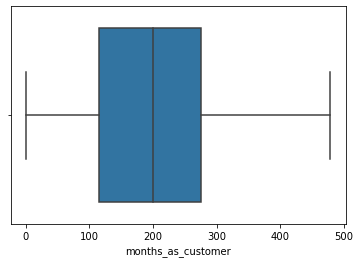

In [242]:
#lets perform analysis

sns.boxplot(Fraud["months_as_customer"])
#there aare no outliers present
#minimum value is 0,median values is 200 and maximum value is 479.

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

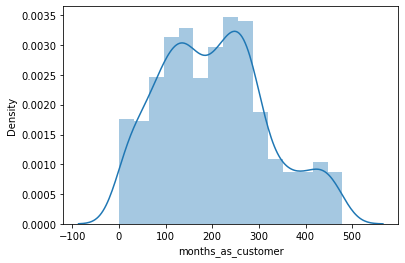

In [243]:
sns.distplot(Fraud["months_as_customer"])
#maximum density is present between 100-300 months and there is hardly any skewness present

<AxesSubplot:xlabel='age'>

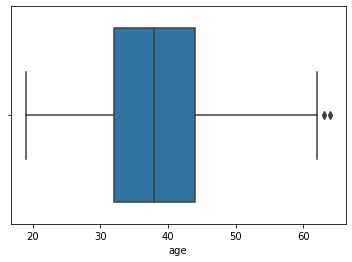

In [244]:
sns.boxplot(Fraud["age"])
#there are two outliers present
#minimum value is 19,median values is 38 and maximum value is 64.

<AxesSubplot:xlabel='age', ylabel='Density'>

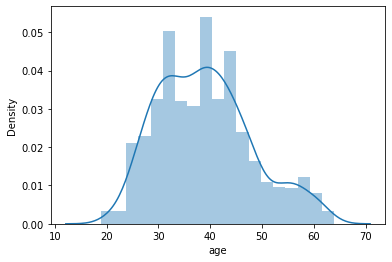

In [245]:
sns.distplot(Fraud["age"])
#maximum density is present between 30-45. Skewness is negligible

<AxesSubplot:xlabel='policy_state', ylabel='count'>

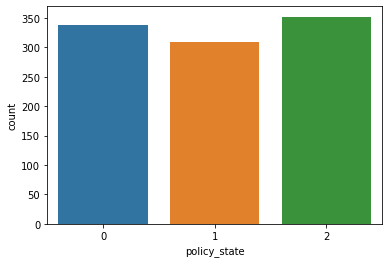

In [246]:
sns.countplot(Fraud["policy_state"])
#ohio has the most count of policy as per other states

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

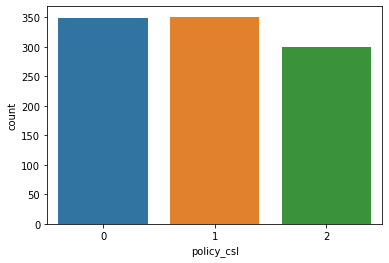

In [247]:
sns.countplot(Fraud["policy_csl"])
#policy_csl with 250/500 is the most compared to others

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

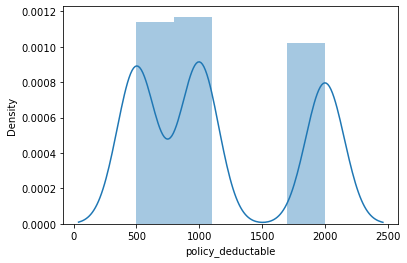

In [248]:
sns.distplot(Fraud["policy_deductable"])
#it has skewness to the right

<AxesSubplot:xlabel='policy_annual_premium'>

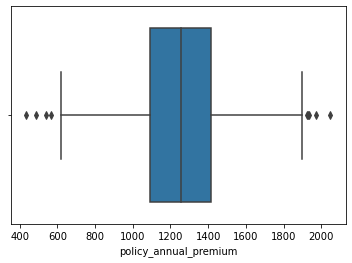

In [249]:
sns.boxplot(Fraud["policy_annual_premium"])
#some outliers are present
#minimum value is 433. Median value is 1257 and maximum value is 2047

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

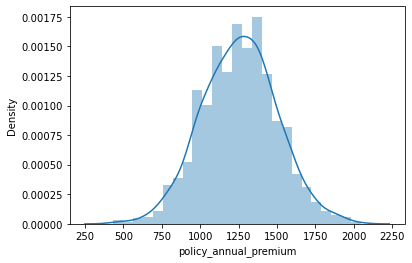

In [250]:
sns.distplot(Fraud["policy_annual_premium"])
#maximum density is between 1000 to 1500.
#no skewness is present

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

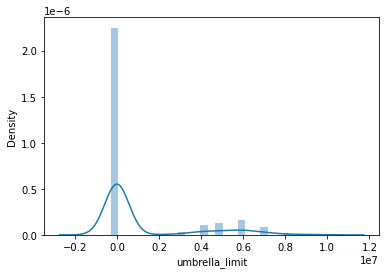

In [251]:
sns.distplot(Fraud["umbrella_limit"])
#skewness to the right is present

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

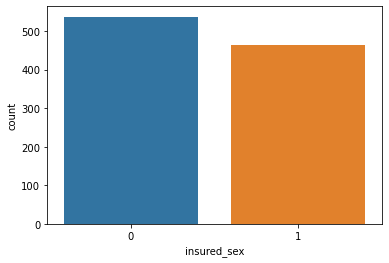

In [252]:
sns.countplot(Fraud["insured_sex"])
#more females are insured than males

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

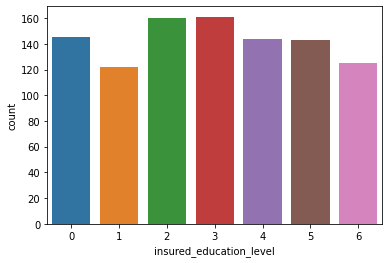

In [253]:
sns.countplot(Fraud["insured_education_level"])
#JD and high school have the most count of insured as per education level

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

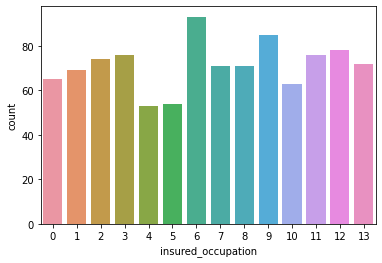

In [254]:
sns.countplot(Fraud["insured_occupation"])
#machine operator inspector has the most count of insured as per occupation list.

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

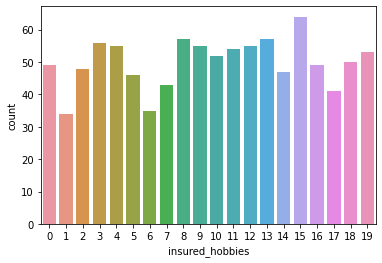

In [255]:
sns.countplot(Fraud["insured_hobbies"])
#most insured hobbies are the ones with reading

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

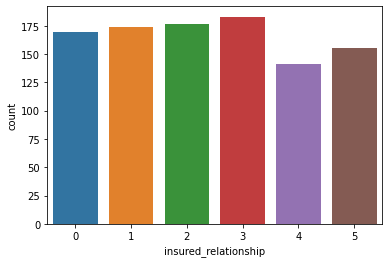

In [256]:
sns.countplot(Fraud["insured_relationship"])
#insured own child is the most in count

<AxesSubplot:xlabel='incident_type', ylabel='count'>

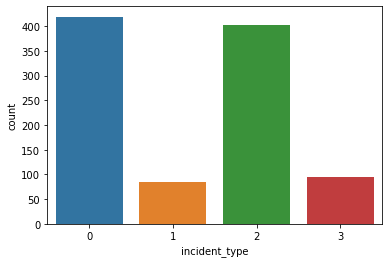

In [257]:
sns.countplot(Fraud["incident_type"])
#multi-vehicle collision has the most count of incident type

<AxesSubplot:xlabel='collision_type', ylabel='count'>

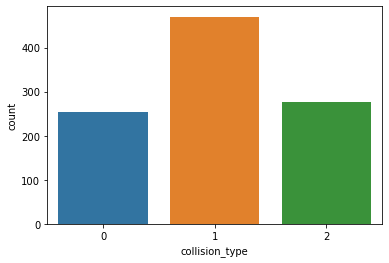

In [258]:
sns.countplot(Fraud["collision_type"])
#rear collision is the most in count

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

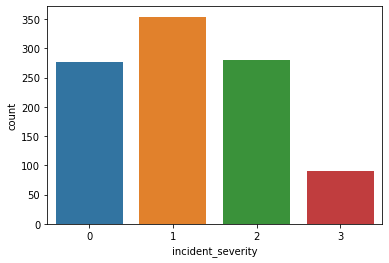

In [259]:
sns.countplot(Fraud["incident_severity"])
#minor damage has the most count of incident severity

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

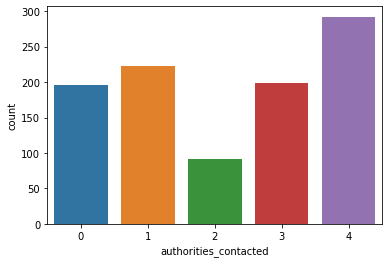

In [260]:
sns.countplot(Fraud["authorities_contacted"])
#the most authorities contacted were the police

<AxesSubplot:xlabel='incident_state', ylabel='count'>

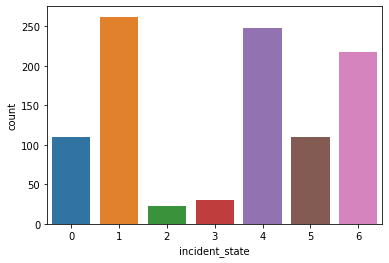

In [261]:
sns.countplot(Fraud["incident_state"])
#NY has the most count of incidents compared to other states

<AxesSubplot:xlabel='incident_city', ylabel='count'>

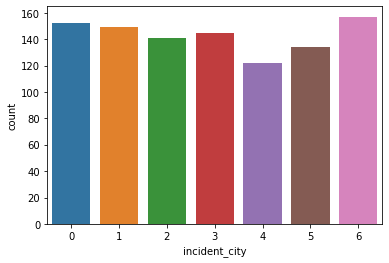

In [262]:
sns.countplot(Fraud["incident_city"])
#springfield has the most count of incidents amongst other cities

<AxesSubplot:xlabel='incident_hour_of_the_day'>

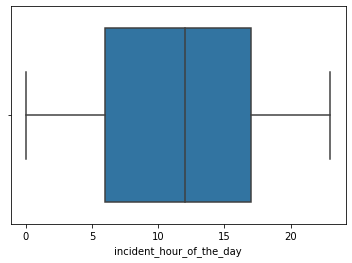

In [263]:
sns.boxplot(Fraud["incident_hour_of_the_day"])
#no outliers are present
#minimum value is 0, median value is 12 and maximum value is 23

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

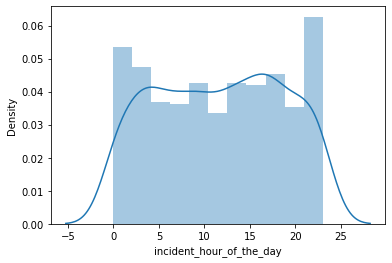

In [264]:
sns.distplot(Fraud["incident_hour_of_the_day"])
#no skewness is present

<AxesSubplot:xlabel='property_damage', ylabel='count'>

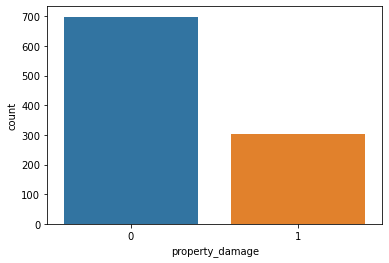

In [265]:
sns.countplot(Fraud["property_damage"])
#most cases property daamange has not taken place

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

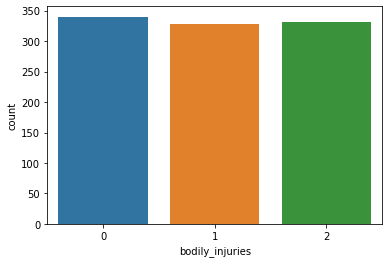

In [266]:
sns.countplot(Fraud["bodily_injuries"])
#nearly the same count as far as bodily injuries is concerned with respect to number of people

<AxesSubplot:xlabel='witnesses', ylabel='count'>

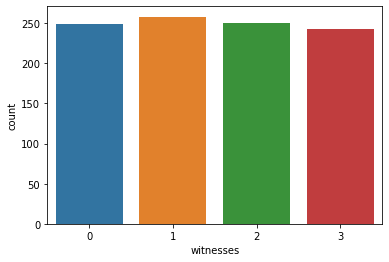

In [267]:
sns.countplot(Fraud["witnesses"])
#nearly the same with respect to witnesses with respect to the witnesses present in terms of people

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

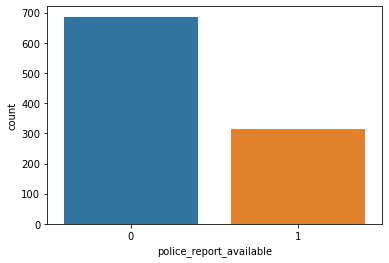

In [268]:
sns.countplot(Fraud["police_report_available"])
#most cases police cases are not available

<AxesSubplot:xlabel='total_claim_amount'>

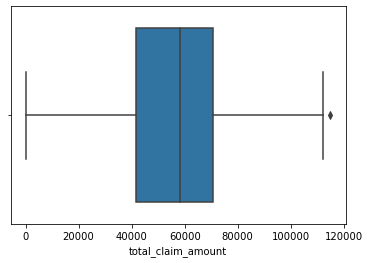

In [269]:
sns.boxplot(Fraud["total_claim_amount"])
#Minimum value is 100. median claim amount is 58055 and maximum is 114920
#one outlier is present

<AxesSubplot:xlabel='injury_claim'>

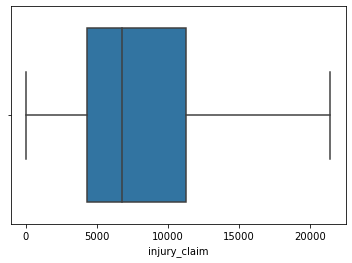

In [270]:
sns.boxplot(Fraud["injury_claim"])
#minimum amount is 0.Median is 6775 am maximum is 21450

<AxesSubplot:xlabel='property_claim'>

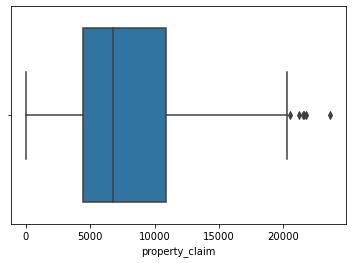

In [271]:
sns.boxplot(Fraud["property_claim"])
#a few outliers are present
#minimum value is 0. Median value is 6750 and maximum value is 23670

<AxesSubplot:xlabel='vehicle_claim'>

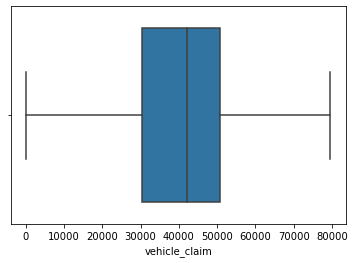

In [272]:
sns.boxplot(Fraud["vehicle_claim"])
#minimum value is 70. Median value is 42100 and maximum value is 79560
#no outliers present

<AxesSubplot:xlabel='auto_make', ylabel='count'>

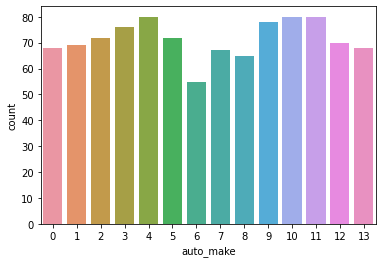

In [273]:
sns.countplot(Fraud["auto_make"])
#saab, dodge and suburu have the most cout of auto_makes

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

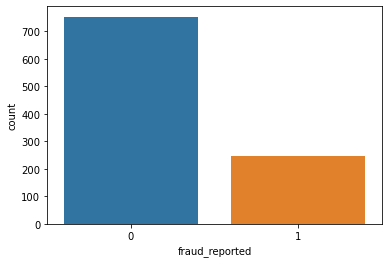

In [274]:
sns.countplot(Fraud["fraud_reported"])
#imbalance is present we will have to balance it in the target variable

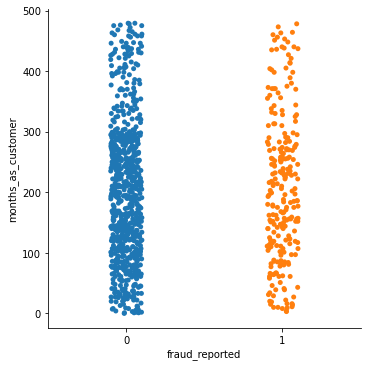

In [275]:
sns.catplot(x="fraud_reported",y="months_as_customer",kind="strip",data=Fraud)
#there are more customers in whos case frauds are not reported

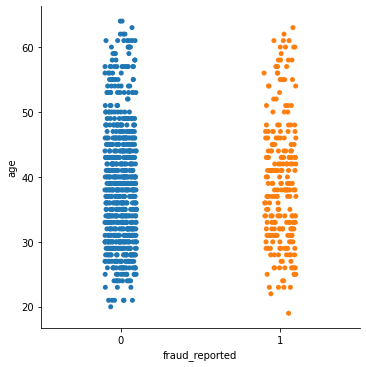

In [276]:
sns.catplot(x="fraud_reported",y="age",kind="strip",data=Fraud)
#there are more customers in whos case frauds are not reported within the same age group

In [277]:
#lets remove some outliers if any

In [278]:
Fraud.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'fraud_reported'],
      dtype='object')

In [279]:
zscore(Fraud)

array([[ 1.07813958,  0.99083647,  1.18717314, ...,  0.74965272,
         0.85646614,  1.74601919],
       [ 0.2089946 ,  0.33407345, -0.01685641, ..., -1.82334593,
         0.36053902,  1.74601919],
       [-0.60800168, -1.08891308,  1.18717314, ..., -0.78556451,
        -0.63131523, -0.57273139],
       ...,
       [-0.64276748, -0.54161057,  1.18717314, ...,  0.77190224,
         1.1044297 , -0.57273139],
       [ 2.20802805,  2.52328351, -1.22088596, ..., -0.07357971,
        -1.37520591, -0.57273139],
       [ 2.19064515,  2.3043625 ,  1.18717314, ..., -1.81434017,
         0.36053902, -0.57273139]])

In [280]:
z=np.abs(zscore(Fraud))

In [281]:
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 29,  6,  6,  6,  5, 14,
        6,  6,  6], dtype=int64))


In [282]:
Fraud_New=Fraud[(z<3).all(axis=1)]

In [283]:
Fraud_New.shape

(980, 33)

In [284]:
#Since the loss of data is within the acceptable limit, we shall use the new data set for further use

In [285]:
Fraud_New.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757


In [286]:
#umbrella limit
#insured zip
#number of vehicles involved
#total claim amount
#vehicle claim

In [287]:
Fraud_New["umbrella_limit"]=power_transform(Fraud_New["umbrella_limit"].values.reshape(-1,1))

Fraud_New["insured_zip"]=power_transform(Fraud_New["insured_zip"].values.reshape(-1,1))

Fraud_New["number_of_vehicles_involved"]=power_transform(Fraud_New["number_of_vehicles_involved"].values.reshape(-1,1))

Fraud_New["total_claim_amount"]=power_transform(Fraud_New["total_claim_amount"].values.reshape(-1,1))

Fraud_New["vehicle_claim"]=power_transform(Fraud_New["vehicle_claim"].values.reshape(-1,1))

In [288]:
#before using machine learning lets separate x and y

In [293]:
x=Fraud_New.drop("fraud_reported",axis=1)
x.shape

(980, 32)

In [295]:
y=Fraud_New["fraud_reported"]
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

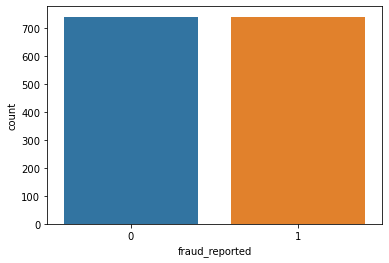

In [308]:
smt=SMOTE()
xtrain,ytrain=smt.fit_resample(x,y)
sns.countplot(ytrain)

In [309]:
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(1036, 32)
(444, 32)
(1036,)
(1036,)


In [310]:
#1) Logistic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#lets predict the y values
pred1=lg.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
score1=cross_val_score(lg,xtrain,ytrain,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.5518018018018018
[[136  77]
 [122 109]]
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       213
           1       0.59      0.47      0.52       231

    accuracy                           0.55       444
   macro avg       0.56      0.56      0.55       444
weighted avg       0.56      0.55      0.55       444

[0.59459459 0.57432432 0.5472973  0.61824324 0.57094595]
0.5810810810810811
0.02388874260765363


In [312]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
#lets predict y values
pred2=knn.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(knn,xtrain,ytrain,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.6824324324324325
[[126  54]
 [ 87 177]]
              precision    recall  f1-score   support

           0       0.59      0.70      0.64       180
           1       0.77      0.67      0.72       264

    accuracy                           0.68       444
   macro avg       0.68      0.69      0.68       444
weighted avg       0.70      0.68      0.69       444

[0.69594595 0.68918919 0.71959459 0.68243243 0.67905405]
0.6932432432432433
0.014396807940988198


In [313]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred3=rf.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(rf,xtrain,ytrain,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.8513513513513513
[[182  35]
 [ 31 196]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       217
           1       0.85      0.86      0.86       227

    accuracy                           0.85       444
   macro avg       0.85      0.85      0.85       444
weighted avg       0.85      0.85      0.85       444

[0.71283784 0.8277027  0.89527027 0.92567568 0.91891892]
0.8560810810810813
0.07956350055704664


In [314]:
#Adaboost
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(ad,xtrain,ytrain,scoring="f1",cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.8153153153153153
[[174  43]
 [ 39 188]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       217
           1       0.81      0.83      0.82       227

    accuracy                           0.82       444
   macro avg       0.82      0.82      0.82       444
weighted avg       0.82      0.82      0.82       444

[0.56790123 0.72243346 0.90032154 0.91147541 0.92763158]
0.8059526453671483
0.1403497303959621


In [315]:
#the best fit model is randomforest so lets hypertune

In [316]:
parameters={"n_estimators":[100,10,120,50],"criterion":["gini","entropy"],"min_samples_leaf":[1,0.1,10,20],"bootstrap":[True,False],"random_state":[42,50,30,100]}
rsearch=RandomizedSearchCV(rf,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 0.1, 10, 20],
                                        'n_estimators': [100, 10, 120, 50],
                                        'random_state': [42, 50, 30, 100]})

In [317]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=120,
                       random_state=50)
{'random_state': 50, 'n_estimators': 120, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': False}
0.8774015235971756


In [318]:
#lets put these best parameters back into the randomforest model

rf1=RandomForestClassifier(random_state=50,n_estimators=120,min_samples_leaf=1,criterion="entropy",bootstrap=False)
rf1.fit(x_train,y_train)
#lets predict y values
pred5=rf1.predict(x_test)
print(accuracy_score(pred5,y_test))
print(confusion_matrix(pred5,y_test))
print(classification_report(pred5,y_test))

0.8468468468468469
[[183  38]
 [ 30 193]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       221
           1       0.84      0.87      0.85       223

    accuracy                           0.85       444
   macro avg       0.85      0.85      0.85       444
weighted avg       0.85      0.85      0.85       444



In [319]:
y_pred_proba=rf1.predict_proba(x_test)[:,1]

In [320]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)

Text(0.5, 1.0, 'Random Forest')

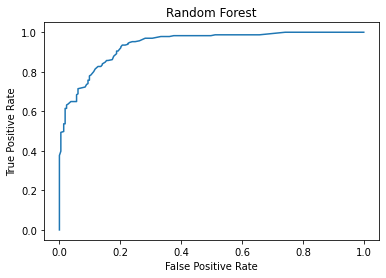

In [321]:
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")

In [322]:
#lets searlise and dump the model
import joblib
joblib.dump(rf1,"rf1.obj")

['rf1.obj']